In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
minst=tf.keras.datasets.fashion_mnist

In [3]:
(train_images,train_labels),(test_images, test_labels)=minst.load_data()

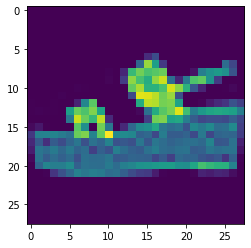

In [4]:
plt.imshow(train_images[12])

In [5]:
train_labels[9]

5

In [6]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
train_images = train_images/255.0
test_images = test_images/255.0

In [8]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.99): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True


In [9]:
model=tf.keras.Sequential([tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                          tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [10]:
callbacks=myCallback()
model.compile(optimizer=tf.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_images, train_labels,epochs=100, callbacks=[callbacks])

Epoch 1/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4752 - accuracy: 0.8285
Epoch 2/100
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3569 - accuracy: 0.8690
Epoch 3/100
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3221 - accuracy: 0.8791
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2951 - accuracy: 0.8911
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2793 - accuracy: 0.8950
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2631 - accuracy: 0.9008
Epoch 7/100
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2500 - accuracy: 0.9065
Epoch 8/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2381 - accuracy: 0.9105
Epoch 9/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2274 - accuracy: 0.9143
Epoch 10/100
1875/1875 [==============================] - 7s 4ms/step - l

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0507 - accuracy: 0.9812
Epoch 80/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0539 - accuracy: 0.9798
Epoch 81/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0522 - accuracy: 0.9811
Epoch 82/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0501 - accuracy: 0.9816
Epoch 83/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0519 - accuracy: 0.9810
Epoch 84/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0471 - accuracy: 0.9831
Epoch 85/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0535 - accuracy: 0.9810
Epoch 86/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0468 - accuracy: 0.9835
Epoch 87/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0518 - accuracy: 0.9818
Epoch 88/100
1875/1875 [==============================] - 7s 4ms/step - loss:

In [11]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.8808 - accuracy: 0.8989


[0.8808402419090271, 0.8988999724388123]

In [14]:
classification=model.predict(test_images)
print(classification[9])


[0.0000000e+00 1.7715001e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.3844222e-23 0.0000000e+00 1.0000000e+00 0.0000000e+00 2.3340434e-24]


In [16]:
print(test_labels[9])

7
